In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from scipy.optimize import curve_fit
import h5py
from pathlib import Path
from collections.abc import Iterable
from matplotlib.colors import LogNorm

In [36]:
datapath = Path.cwd()
file = "mean_std.jld2"

# Scaling Plot Total Error

In [37]:
f = h5py.File(file, "r")
mean_std_RS_13 = f["mean_std_RS_13"][()]
mean_std_RPS_13 = f["mean_std_RPS_13"][()]
mean_std_BS_13 = f["mean_std_BS_13"][()]

mean_std_RS_15 = f["mean_std_RS_15"][()]
mean_std_RPS_15 = f["mean_std_RPS_15"][()]
mean_std_BS_15 = f["mean_std_BS_15"][()]

mean_std_RS_17 = f["mean_std_RS_17"][()]
mean_std_RPS_17 = f["mean_std_RPS_17"][()]
mean_std_BS_17 = f["mean_std_BS_17"][()]

mean_std_RS_19 = f["mean_std_RS_19"][()]
mean_std_RPS_19 = f["mean_std_RPS_19"][()]
mean_std_BS_19 = f["mean_std_BS_19"][()]

mean_std_RS_21 = f["mean_std_RS_21"][()]
mean_std_RPS_21 = f["mean_std_RPS_21"][()]
mean_std_BS_21 = f["mean_std_BS_21"][()]

Ns = [13,15,17,19,21]
n_states_RS = np.arange(2,101,1)
n_states = np.arange(2,1001,1)

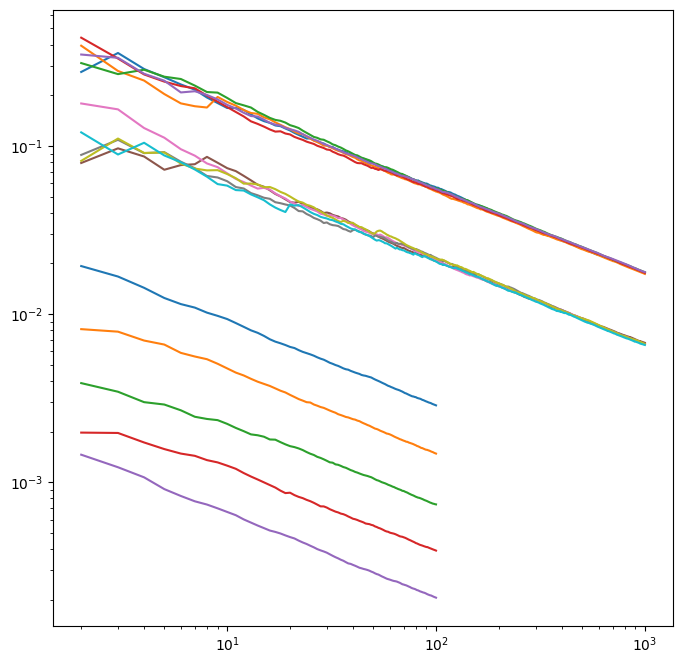

In [38]:
fig = plt.figure(figsize=(8,8))
plt.plot(n_states_RS,mean_std_RS_13)
plt.plot(n_states_RS,mean_std_RS_15)
plt.plot(n_states_RS,mean_std_RS_17)
plt.plot(n_states_RS,mean_std_RS_19)
plt.plot(n_states_RS,mean_std_RS_21)

plt.plot(n_states,mean_std_RPS_13)
plt.plot(n_states,mean_std_RPS_15)
plt.plot(n_states,mean_std_RPS_17)
plt.plot(n_states,mean_std_RPS_19)
plt.plot(n_states,mean_std_RPS_21)

plt.plot(n_states,mean_std_BS_13)
plt.plot(n_states,mean_std_BS_15)
plt.plot(n_states,mean_std_BS_17)
plt.plot(n_states,mean_std_BS_19)
plt.plot(n_states,mean_std_BS_21)
plt.yscale("log")
plt.xscale("log")
plt.show()

In [34]:
list(map(lambda x: x//2+1+4,Ns))

[11, 12, 13, 14, 15]